[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/KingaS03/Introduction-to-Python-2020-June/master)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/KingaS03/Introduction-to-Python-2020-June)

# 1. Introduction to the Mathematics Module for ML and DS

We are going to consider a common machine learning context, as this is illustrating all the major components of our course.

## 1.1. Machine learning versus classical programming
First let's take a look at machine learning and compare it with classical programming.

------------------------------------
*Machine Learning is the "field of study that gives computers the ability to learn without being explicitly programmed."* - Arthur Samuel, 1959

-------------------------------------

<center>
<img src="Images/TraditionalProgr.png" width="300"> 
</center>

versus

<center>
<img src="Images/MachineLearning0.png" width="300"> 
</center>

In case of some machine learning problems the resulting rules can be conceived as a model, which for any input data is able to predict the associated output. 

<center>
<img src="Images/MachineLearning1.png" width="300"> 
</center>

Mathematically we can think of this model as a function that assigns to an input value a predicted output value and at the same time it depends also on some model parameters (weights and intercept). The model parameters are determined in such a way to minimise the loss function. This phenomenon is concisely described in the following quote:

-----------
*"A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E."* - Tom Mitchell, 1997

---------------

## 1.2. Simple machine learning setting - Linear regression
One of the simplest settings of a machine learning algorithm is the linear regression. To get a quick intuition about how it works play with the below interactive graph. You can change the position of the blue datapoints by dragging them with the mouse. You can change the position of the red line by moving the two red points of it.

What happens on the plot on the right hand side if you change the position of one of the red points? How can you explain the observed behaviou?

Take a look at the blue end red values in the upper right corner. How do these values change?

What is the starting point of a regression analysis and what is its objective?

In [22]:
from IPython.display import IFrame

#IFrame("https://www.geogebra.org/m/xC6zq7Zv",800,800)
IFrame("https://www.geogebra.org/classic/gvtvpem2", 1400, 600)

Let's take a look at a concrete numerical example:

We would like to predict the price of apartments as a linear function of their surface.

We consider the following data points:
    
| Surface area in $m^2$ | Price in tausends of CHF | 
| --- | --- |
| 40| 275| 
| 70 | 500 | 
| 80 | 470 | 
| 100 | 650 | 
| 115 | 690 | 
| 120 | 750 | 

The surface area, denoted by $x$, is the single **explanatory/dependent variable**. 

The price, denoted by $y$, is the single **independent variable**.

The apartments, whose prices are enlisted in the above table are called **observations** and we will refer to their **features** (surface and price) as $x_i$, respectively $y_i$, where $i$ is the index of the apartment ($i = \overline{0,5}$).

We would like to approximate our data points by a line defined by the equation
$$ y = w\cdot x + b,$$
where $w$ is called **weight/gradient** and $b$ is called **intercept**. These parameters $w$ and $b$ are determined in such a way that the mean squared error of the approximations is minimal.

For our set of apartments the **$MSE$ (mean squared error)** can be calculated as follows:
$$\begin{align*}
MSE &= \frac{1}{6}\sum_{i=0}^5 \left(y_i - (w \cdot x_i + b)\right)^2\\
& = \frac{1}{6}\left(\left(275-(w\cdot 40 + b)\right)^2 + \left(500-(w\cdot 70 + b)\right)^2 + \left(470-(w\cdot 80 + b)\right)^2 + \left(650-(w\cdot 100 + b)\right)^2 + \left(690-(w\cdot 115 + b)\right)^2 + \left(750-(w\cdot 120 + b)\right)^2\right)
\end{align*}$$

$MSE$ is a function of the parameters $b$ and $w$.

The goal is to determine the parameters $b$ and $w$ in such a way to obtain the minimal $MSE$.

Experiment with the following code. Fit the red line to the data points by trying out different values for the parameters $w$ and $b$.

Text(0,0.5,'Price (tausend CHF)')

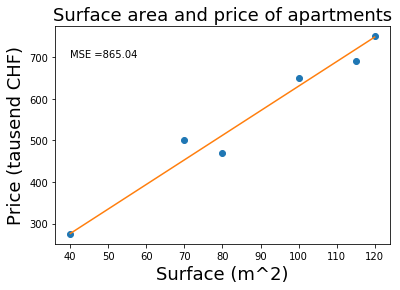

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 300 random samples
x = np.array([40, 70, 80, 100, 115, 120])
y = np.array([275, 500, 470, 650, 690, 750])

plt.plot(x, y, 'o') #scatter plot of data points

w = 5.9 # change this value
b = 40 # change this value

plt.plot(x, b + w*x) #add line of best fit

MSE = np.mean((y-(b + w*x))**2)

# legend, title, and labels.
plt.text(40,700, f"MSE ={MSE:.2f}")
plt.title('Surface area and price of apartments', size=18)
plt.xlabel('Surface (m^2)', size=18)
plt.ylabel('Price (tausend CHF)', size=18)

Compare your values with the optimal ones, by running the code<br> 
`w, b = np.polyfit(x, y, 1)`.

Due to the simplicity of the linear model, it is possible to derive the explicit formulas for the parameters by calculating the partial derivatives of the $MSE$ w.r.t. the parameters and setting the values of these to $0$. Without detailed explanation 
$$\frac{\partial MSE}{\partial w} = 0, \quad \frac{\partial MSE}{\partial b} = 0$$
one can conclude:
$$\left\{\begin{align*}
w &= \frac{\sum\limits_i (x_i - \overline{x})\cdot (y_i-\overline{y})}{\sum\limits_i(x_i - \overline{x})^2} = 5.70\\
b &= \overline{y}-w\cdot \overline{x} = 57.30
\end{align*}\right.
$$
where $\overline{x} = \frac{\sum_i x_i}{n}$ and $\overline{y} = \frac{\sum_i y_i}{n}$


## 1.3. Neuronal networks
The above univariate linear regression model can be presented as

<center>
<img src="Images/Network0.png" width="300"> 
</center>

For the future notation we leave away the virtual input of 1.

Now we make the model more complex until we get to the a two-layer neuronal network. First we apply an activation function $g$ to the linear transformation $b+w \cdot x$.

<center>
<img src="Images/Network1.png" width="320"> 
</center>

The above red ball corresponds to the smallest building unit of a neuronal network, namely a neuron. In a neuron:
- there happens a linear transformation
- to which an activation function is applied and this provides the output of the neuron.

Next we allow for more inputs. 
<center>
<img src="Images/MultiNetwork00.png" width="320"> 
</center>

Finally we allow also for more outputs and we have two hidden layers. 
<center>
<img src="Images/MultiNetwork2.png" width="500"> 
</center>

The number of hidden layers indicates that the last neuronal network is a two-layer neuronal network.


## 1.4. Motivation

Exactly as in the case of linear regression the weight matrices $W^{(1)}$, $W^{(2)}$, respectively the intercepts $b^{(1)}$ and $b^{2}$ will be parameters of the loss function which is subject to minimisation. In the general case there is no immediate straightforward formula for the optimal parameters. 
<center>
The minimum of the loss function can be approximated by the **gradient descent** method. 
    $$\hspace{-2cm}\Uparrow$$
For the gradient descent method we should be able to derive the **partial derivatives** of the outputs w.r.t. all parameters of the model.
    $$\hspace{-2cm}\Uparrow$$
For neuronal networks with more hidden layers and differentiable activation functions these partial derivatives can be deremined by the **chain rule**.
$$\hspace{-2cm}\Uparrow$$
To apply the chain rule for a setting like in the last network, one needs to perform **matrix multiplications**.
</center>

The number of machine learning algorithms is large. That's why generally a huge amount of input data is needed to determine the model parameters. Alternatively, if we don't possess that much data, we can reduce the dimensionality of the input data (and by that we end up also with a smaller number of model parameters). For dimensionality reduction we can use the **PCA (principal component analysis)**, which is the same as singular value decomposition. The first name is used more in the circle of statisticians and the second name is more popular among theoretical mathematicians. To derive PCA, we need the notion of **orthogonal projection**, **eigenvalues and eigenvectors**, **the method of Lagrange multipliers** and some **descriptive statistics**.

Furthermore, when the output of a neuronal network is a distribution, **probability theory** will be needed also to measure the distance between the observed distribution and the predicted one.

## 1.5. Schedule
-Linear algebra
 - vector operations
     - vector addition, 
     - vector substraction, 
     - multiplication of a vector by a scalar
     - the dot product
 - matrix operations
     - matrix addition
     - matrix substraction
     - multiplication of a matrix by a scalar
     - matrix multiplication
     - inverse of a square matrix
 - projection and the dot product
 - orthogonal matrices
 - change of basis
 - eigenvalues and eigenvectors of matrices
 
-Calculus

-PCA

-Probability theory and statistics

# 2. Linear algebra

## 2.1. Motivation
We are able to solve equations of the form:
$ax + b = c$, where $a,b,c$ are real coefficients and $x$ is the unknown variable.

For example we can follow the next steps to solve the  $5x + 3 = 13$ equation

$$\begin{align*}
5x + 3 &= 13 \quad | -3\\
5x &= 10 \quad | : 5\\
x &= 2\\
\end{align*}$$

or equivalently

$$\begin{align*}
5x + 3 &= 13 \quad | +(-3)\\
5x &= 10 \quad | \cdot 5^{-1}= \frac{1}{5}\\
x &= 2\\
\end{align*}$$

Let us consider the following set-up. You have beakfast together with some of your colleagues and you are paying by turn. You don't know the price of each ordered item, but you remember what was ordered on the previous three days and how much did your colleagues pay for it each time: 
- 3 days ago your group has ordered 5 croissants, 4 coffees and 3 juices and they have payed 32.3 CHF.
- 2 days ago your group has ordered 4 croissant, 5 coffees and 3 juices and they payed 32.5 CHF.
- 1 day ago the group has ordered 6 croissants, 5 coffees and 2 juices and that costed 31 CHF.

Today the group has ordered 7 croissants, 4 coffees and 2 juices and you would like to know whether the amount of 35 CHF available on your uni card will cover the consumption or you need to recharge it before paying.

By introducing the notations
- $x_1$ for the price of a croissant,
- $x_2$ for the price of a coffee,
- $x_3$ for the price of a juice,
then our information about the consumption of the previous 3 days can be summarised in the form of the following 3 linear equations <br><br>
$$\left\{\begin{align}
&5\cdot x_1 + 4 \cdot x_2 + 3 \cdot x_3 = 32.3 \\
&4\cdot x_1 + 5 \cdot x_2 + 3 \cdot x_3 = 32.5 \\
&6\cdot x_1 + 5 \cdot x_2 + 2 \cdot x_3 = 31
\end{align}\right.$$
<br>
The quantity ordered on the current day is $7\cdot x_1 + 4 \cdot x_2 + 2 \cdot x_3$. To determine this one possibility is to calculate the price of each product separately, i.e. we solve the linear equation system first and then susbstitute the prices in the previous formula.

The above system in matrix form
<br><br>
$$
\left(\begin{array}{ccc}
5 & 4 & 3\\
4 & 5 & 3\\
6 & 5 & 2
\end{array}
\right)\cdot \left(\begin{array}{c}
x_1\\
x_2\\
x_3 
\end{array}
\right) = 
\left(\begin{array}{c}
32.3\\
32.5\\
31 
\end{array}
\right)$$
<br>
If we introduce for the matrix, respectively the two vectors in the above formula the notations $A, x, b$, then we get <br><br>
$$A \cdot x = b$$
<br>
One can observe that formally this looks the same as the middle state of our introductory linear equation with real coefficients $5x = 10$. So our goal is to perform a similar operation as there, namely we are looking for teh operation that would make $A$ dissappear from the left hand side of the equation. We will see later that this operation will be the inverse operation of multiplication by a matrix, namely multiplication by the inverse of a matrix.

In our applications we will encounter for example when deriving the weights of the multivariate linear regression, a matrix equation of the form:
$A \cdot x + b = 0$. This example motivates the introduction of vector substraction, as well.


## 2.2. Vectors

----------
**Definition of vectors**

Vectors are elements of a linear vector space.
The vector space we are going to work with is $\mathbb{R}^n$, where $n$ is the dimension of the space and it can be $1, 2, 3, 4, ...$. An element of such a vector space can be described by an ordered list of $n$ components of the vector.

$x = (x_1, x_2, \ldots, x_n)$, where $x_1, x_2,\ldots,x_n \in \mathbb{R}$ is an element of $\mathbb{R}^n$.

-----------

**Example**<bf>
$x = (1,2)$ is a vector of the two dimensional vector space $\mathbb{R}^2$.

### 2.2.1. Geometrical representation of vectors

Below a 2-dimensional vector is represented. You can move its endpoints on the grid and you will see how do its components change.

In [14]:
IFrame("https://www.geogebra.org/classic/cnvxpycc", 800, 600)

Experiment with the 3-dimensional vector in the interactive window below.

In [18]:
IFrame("https://www.geogebra.org/classic/meg4scuj", 800, 600)

The following interactive window explains when are two vectors equal.

In [23]:
IFrame("https://www.geogebra.org/classic/fkkbkvuj", 800, 600)

### 2.2.2. Vector addition

------
**Definition of vector addition**

Vector addition happens component-wise, namely the sum of the vectors $x = (x_1, x_2, \cdots, x_n)$ and $y = (y_1, y_2, \cdots, y_n)$ is:

$$x+y = (x_1 + y_1, x_2+y_2, \ldots, x_n+y_n)$$

------

There exist two approaches to visualise vector addition
1. parallelogram method
2. triangle method

Both are visualised below.

In [25]:
IFrame("https://www.geogebra.org/classic/jnchvrhg", 800, 600)

Below you can see another approach to vector addition.

In [62]:
IFrame("https://www.geogebra.org/classic/mzgchv22", 1200, 600)

### 2.2.3. Multiplication of vectors by a scalar

-------------
**Definition of the multiplication by a scalar**

This happens also component-wise exactly as addition, namely
$$\lambda  (x_1, x_2, \ldots, x_n) = (\lambda x_1, \lambda x_2, \ldots, \lambda x_n).$$

-------------
This operation is illustrated below

In [61]:
IFrame("https://www.geogebra.org/classic/gxhsev8k", 800, 800)

### 2.2.4. Vector substraction

------
**Definition of vector substraction**

Vector substraction happens component-wise, namely the difference of the vectors $x = (x_1, x_2, \cdots, x_n)$ and $y = (y_1, y_2, \cdots, y_n)$ is:

$$x-y = (x_1 - y_1, x_2 - y_2, \ldots, x_n -y_n)$$

------

Observe that vector substraction is not commutative, i.e. $x-y \neq y-x$ in general.

### 2.2.5. Abstract linear algebra terminology

1. For any two elements $x,y \in \mathbb{R}^n$ it holds that
$$x+y \in \mathbb{R}^n.$$
This property is called **closedness** of $\mathbb{R}^n$ w.r.t. addition.

2. Observe the **commutativity** of the addition on $\mathbb{R}^n$ is inherited by the vectors in $\mathbb{R}^n$, i.e. $$x + y = y + x$$ for any $x, y \in \mathbb{R}^n$.

3. Observe that addition is also **associative** on $\mathbb{R}^n$, i.e.
$$x + (y + z) = (x + y) + z, \quad \mbox{ for any } x,y,z \in \mathbb{R}^n$$

4. If we add the zero vector $\mathbf{0} = (0, 0, ..., 0) \in \mathbb{R}^n$ to any other vector $x \in \mathbb{R}^n$ it holds that
$$\mathbf{0} + x = x + \mathbf{0} = x.$$
The single element with the above property is called the **neutral element** w.r.t. addition.

5. For a vector $x = (x_1, x_2, \ldots, x_n)$ the vector $x^*$ for which
$$x + x^* = x^* + x = \mathbf{0}$$
is called the **inverse vector** of $x$ w.r.t. addition.

What is the inverse of the vector $x = (2, 3, -1)$? Inverse: $-x = (-2,-3,1)$

What is the inverse of a vector $x = (x_1, x_2, \ldots, x_n)$? Inverse: $-x = (-x_1, -x_2, \ldots, -x_n)$

As every vector of $\mathbb{R}^n$ possesses an inverse, we introduce the notation $-x$ for its inverse  w.r.t addition.

A set $V$ with an operation $\circ$ that satsifies the above properties is called a **commutative or Abelian group** in linear algebra. For us $V = \mathbb{R}^n$ and $\circ = +$.

The scalar mutiplication, that we have introduced, has the following properties
6. **associativity** of multiplication: $(\lambda_1\lambda_2) x = \lambda_1 (\lambda_2x)$, 
7. **distributivity**: $(\lambda_1 + \lambda_2) x = \lambda_1  x + \lambda_2  x$ and $\lambda(x+y) = \lambda x + \lambda y$,
8. **unitarity**: $1 x = x$,
for all $x,y \in \mathbb{R}^n$ and $\lambda, \lambda_1, \lambda_2$ scalars.

Our scalars are elements of $\mathbb{R}$. This set is a **field**, i.e. the operations $\lambda_1+\lambda_2$, $\lambda_1-\lambda_2$, $\lambda_1\cdot\lambda_2$ make sense for any $\lambda_1, \lambda_2 \in \mathbb{R}$ and the $\lambda_1/\lambda_2 = \lambda_1 \cdot \lambda_2^{-1}$ can be performed also when $\lambda_2 \neq 0$.

A **vector space** consists of a set $V$ and a field $F$ and two operations:
- an operation called vector  addition that takes two vectors $v,w \in V$, and produces a third vector, written $v+w \in V$,
- an operation called scalar multiplication that takes a scalar $\lambda \in F$ and a vector $v\in V$, and produces a new vector, written $cv \in V$,
which satisfy all the properties enlisted above (5+3).

---------
**Remark**<br>
Observe that
$$x-y = x+(-y),$$
<br>
which means that the difference of $x$ and $y$ can be visualised as a vector addition of $x$ and $-y$.

$-y$ is here the inverse of the vector $y$ w.r.t. addition. Geometrically $-y$ can be represented by the same oriented segment as $y$, just with opposite orientation.

----------

## 2.2.6. Modulus of a vector, length of a vector, size of a vector

The length of a vector or norm of a vector $x = (x_1, x_2, \cdots, x_n)$ is given by the formula
$$||x|| = \sqrt{x_1^2 + x_2^2 + \cdots x_n^2}$$

Experiment with the interactive window below and derive the missing formula.

In [63]:
IFrame("https://www.geogebra.org/classic/mfzdes3n", 800, 600)

Each vector $x = (x_1, x_2, \ldots, x_n) \in \mathbb{R}^n$ is uniquely determined by the following two features: 
- its magnitude / length / size / norm: $r(x) = ||x|| = \sqrt{x_1^2 + x_2^2 + \cdots +x_n^2}$,
- its direction: $e(x) = \frac{x}{||x||} = \frac{1}{\sqrt{x_1^2 + x_2^2 + \cdots +x_n^2}}(x_1, x_2, \ldots, x_n)$.

If the maginute $r \in \mathbb{R}$ and the direction $e \in \mathbb{R}^n$ of a vector is given, then this vector can be written as $re$.

Observe that $\frac{x}{||x||}$ has length $1$.

## 2.2.7. Dot product / inner product / scalar product

-----------------
Definition of the **dot product**

The **dot product / inner product / scalar product** of two vectors $x = (x_1, x_2)$ and $y = (y_1, y_2)$ is denoted by $\langle x, y\rangle$ and it is equal to the scalar $x_1\cdot y_1+ x_2 \cdot y_2$.

This can be generalised to the vectors $x = (x_1, x_2, \cdots, x_n) \in \mathbb{R}^n$ and $y = (y_1, y_2, \cdots, y_n) \in \mathbb{R}^n$ as $\langle x, y\rangle = x_1\cdot y_1 + x_2 \cdot y_2 + \cdots + x_n\cdot y_n$.

---------------

Observe that as a consequence of the definition distributivity over addition holds, i.e. $\langle x , y + z\rangle = \langle x , y \rangle + \langle x , z \rangle$.

Furthermore $\lambda \langle x , y\rangle  = \lambda \langle x, y\rangle = \langle x , \lambda y\rangle $.

The last two properties together are called also **bilinearity** of the scalar product.

Observe also that the scalar product is **commutative**, i.e. $x \cdot y = y \cdot x$.

--------------------------------------
**Question:** What's the relation between the length of a vector and the dot product?

Length of a vector: $||x|| = \sqrt{x_1^2+x_2^2 + \cdots x_n^2}$

The dot product of two vectors: $\langle x , y \rangle= x_1\cdot y_1 + x_2 \cdot y_2 + \cdots + x_n\cdot y_n$.

Substituting $x$ in the last equation instead of $y$, we obtain

$$\mathbf{\langle x , x \rangle} = x_1^2+x_2^2 + \cdots x_n^2 = \mathbf{||x||^2}$$

--------------------------------
**Convention**<br>
When talking exclusively about vectors, for the simplicity of writing, we often think of them as row vectors. However, when matrices appear in the same context and there is a chance that we will multiply a matrix by a vector, it is important to specify also whether we talk about a row or column vector. In this extended context a vector is considered to be a column vector by default.

From now on we are going to follow also this convention and we are going to think of a vector always as a column vector.

----------------
**Relationship of dot product and matrix multiplication**<br> 

Even if we didn't define formally the matrix product yet, we mention its relationship with the dot product, because in mathematical formulas it proves to be handy to have an alternative way for writing the dot multiplication.

The following holds for any vectors $x,y \in \mathbb{R}^n$
$$\mathbf{\langle x,y \rangle} = x_1\cdot y_1 + x_2 \cdot y_2 + \cdots x_n \cdot y_n = (\begin{array}{cccc}
x_1 & x_2 & \ldots & x_n
\end{array})\cdot\left(\begin{array}{c}
y_1\\
y_2\\
\vdots\\
y_n
\end{array}\right) = \mathbf{x^T \cdot y},$$
where $\mathbf{x^T \cdot y}$ denotes the matrix product of the row vector $x_T$ and the column vector $y$.

Furthermore, observe that due to the commutativity of the dot product <br><br>
$$x^T \cdot y = \langle x, y \rangle = \langle y, x\rangle = y^T \cdot x$$

-----------

## 2.2.8. The dot product and the cosine rule
Let us consider two vectors $u$ and $d$ and denote their angle by $\theta$. We construct the triangle having as sides the vectors $u$, $d$ and $u-d$. In the forthcoming we derive the formula
$$\langle u,  d \rangle = ||u||\cdot ||d||\cdot cos(\theta)$$ from the law of cosines.

<center>
<img src="Images/Projection.png" width="400"> 
</center>

The **law of cosines** is a generalisation of the **Pythagorean theorem** in a triangle, which holds not just for right triangles. As the Pythagorean theorem, this formulates also a relationship between the lengths of the three sides. In a triangle with side lengths $a$, $b$ and $c$ and an angle $\theta$ opposite to the side with length $a$, the law of cosines claimes that <br>

$$a^2 = b^2 + c^2 - 2bc\cos(\theta).$$

In our setting we can write for the side lengths the norm / length of the vectors $u$, $d$, respectively $u-d$. In this way we obtain <br>

$$||u-d||^2 = ||u||^2 + ||d||^2 - 2\cdot||u||\cdot ||d||\cdot\cos(\theta).$$

On the other hand using the relationship between the length of a vector and the dot product, we can write the following <br>

$$\begin{align*}
||u-d||^2 = \langle u-d,u-d \rangle
\end{align*}$$

Using the bilinearity and commutativity of the dot product we can continue by <br><br>
$$\begin{align*}
||u-d||^2 = \langle u-d,u-d \rangle = \langle u, u\rangle - \langle d,u \rangle - \langle u,d \rangle - \langle d, d \rangle = ||u||^2 + ||d||^2- 2\langle d,u \rangle
\end{align*}$$

Summing up what did we obtain until now <br><br>
$$\left\{
\begin{align*}
||u-d||^2 = ||u||^2 + ||d||^2 - 2\cdot||u||\cdot ||d||\cdot\cos(\theta)\\
||u-d||^2 = ||u||^2 + ||d||^2- 2\langle d,u \rangle
\end{align*}
\quad \right|
\Rightarrow  \quad
||u||^2 + ||d||^2 - 2\cdot||u||\cdot ||d||\cdot\cos(\theta) = ||u||^2 + ||d||^2- 2\langle d,u \rangle
$$
<br>
or equivalently
$$ ||u||\cdot ||d||\cdot\cos(\theta) = \langle d,u \rangle.$$


## 2.2.9. Scalar and vector projection

**Scalar projection:** length of the resulting projection vector, namely <br>

$$||\pi_d(u)|| = cos(\theta) \cdot ||u|| $$

where $\theta$ is the angle of the vectors $d$ and $u$.

Due the cosine rule that we have derived for the scalar product, we can substitute $\cos(\theta)$ by $\frac{\langle d,u\rangle}{||u|| \cdot ||d||}$ and we obtain the following formula for the length of the projection

$$||\pi_d(u)|| = \frac{\langle u, d \rangle}{||u|| \cdot ||d||} \cdot ||u|| = \frac{\langle u,d \rangle}{||d||}$$

**Vector projection:** We have determined the magnite of the projection vector, the direction is given by the one of the vector $d$. These two characteristics do uniquely define the projection vector, thus we can write

$$\pi_d(u) = ||\pi_d(u)|| \frac{d}{||d||}= \mathbf{\frac{\langle u, d\rangle }{||d||} \frac{d}{||d||}} = \frac{d \langle u, d\rangle}{||d||^2} = \frac{d \langle d, u\rangle}{||d||^2}= \frac{d \cdot (d^T \cdot u)}{||d||^2}= \frac{(d \cdot d^T) \cdot u}{||d||^2} = \mathbf{\frac{d \cdot d^T}{||d||^2}\cdot u}$$

The projection matrix $\frac{d \cdot d^T}{||d||^2}$ in $\mathbb{R}^n$ is an $n \times n$-dimensional matrix.

**Exersize**<br> 
Change the canonical basis to another orthogonal basis by scalar projection.

<!--Ex. 2. In PCA we can project basically on the first eigenvector and on its orthogonal complement.-->

In [70]:
IFrame("https://www.geogebra.org/classic/qhhqpmrt", 1000, 600)

## 2.2.10. Basis of a vectorspace, linear independence of vectors

--------
**Definition of linear combination**

A linear combination of the vectors $x^{(1)}, x^{(2)}, \ldots, x^{(m)} \mathbb{R}^n$ is a vector of $\mathbb{R}^n$, which can be written in the form of 

$$\lambda_1x^{(1)} + \lambda_2 x^{(2)} + \cdots \lambda_m \cdot x^{(m)},$$

where $\lambda_1, \lambda_2, \ldots, \lambda_m$ are real valued coefficients.

--------
**Example**

Consider the vectors $x^{(1)} = \left(
\begin{array}{c}
1 \\
0\\
2
\end{array}
\right)$ and 
$x^{(2)} = \left(
\begin{array}{c}
0 \\
1\\
0
\end{array}
\right).$

Then 

$$2 x^{(1)} + 3x^{(2)}= 2\left(
\begin{array}{c}
1 \\
0\\
2
\end{array}
\right) + 3 \left(
\begin{array}{c}
0 \\
1\\
0
\end{array}
\right) = \left(
\begin{array}{c}
2 \\
3\\
4
\end{array}
\right)$$

is a linear combination of $x^{(1)}$ and $x^{(2)}$.

-------
**Definition of linear dependence**

Let us consider a set of $m$ vectors $x^{(1)}, x^{(2)}, \ldots, x^{(m)}$ in $\mathbb{R}^n$. They are said to be linearly dependent if and only if there exist the not all zero factors $\lambda_1, \lambda_2, \ldots, \lambda_m \in \mathbb{R}$  such that<br>

$$\lambda_1x^{(1)} + \lambda_2 x^{(2)} + \cdots +\lambda_m  x^{(m)} = \mathbf{0}$$

-------

**Remark**<br>
Observe that if $x^{(1)}, x^{(2)}, \ldots, x^{(m)}$ are dependent, then for some not all zero factors $\lambda_1, \lambda_2, \ldots, \lambda_m \in \mathbb{R}$ it holds that<br>

$$\lambda_1x^{(1)} + \lambda_2 x^{(2)} + \cdots + \lambda_mx^{(m)} = \mathbf{0}$$

We know that at least one of the factors is not zero, let us assume that $\lambda_i$ is such a factor. This means that from the above equation we can express the vector $x_i$ as a linear combination of the others.

-------
**Definition of linear independence**

$m$ vectors $x^{(1)}, x^{(2)}, \ldots, x^{(m)}$ in $\mathbb{R}^n$ are linearly independent if there exist no such factors $\lambda_1, \lambda_2, \ldots, \lambda_m \in \mathbb{R}$ for which <br>

$$\lambda_1x^{(1)} + \lambda_2 x^{(2)} + \cdots + \lambda_m  x^{(m)} = \mathbf{0}$$

and where at least one factor is different of zero. 

**Alternative definition of linear independence**

Equivalently $x^{(1)}, x^{(2)}, \ldots, x^{(m)}$ in $\mathbb{R}^n$ are linearly independent if and only if the equation <br>

$$\lambda_1x^{(1)} + \lambda_2 x^{(2)} + \cdots +\lambda_m  x^{(m)} = \mathbf{0}$$

holds just for $\lambda_1 = \lambda_2 = \cdots = \lambda_m = 0.$

-------

**Remark**

If we write the vectors from the above equation by their components, the above equation can be equivalently transformed to  
$$\begin{align}
\lambda_1 \left(
\begin{array}{c}
x_1^{(1)} \\
x_2^{(1)}\\
\vdots\\
x_n^{(1)}
\end{array}
\right) + 
\lambda_2 \left(
\begin{array}{c}
x_1^{(2)} \\
x_2^{(2)}\\
\vdots\\
x_n^{(2)}
\end{array}
\right) + \cdots +
\lambda_m \left(
\begin{array}{c}
x_1^{(m)} \\
x_2^{(m)}\\
\vdots\\
x_n^{(m)}
\end{array}
\right) &= \mathbf{0}\\ \\
\Leftrightarrow \quad 
\left(
\begin{array}{c}
\lambda_1 x_1^{(1)} + \lambda_2 x_1^{(2)} + \cdots+ \lambda_m x_1^{(m)}\\
\lambda_1 x_2^{(1)} + \lambda_2 x_2^{(2)} + \cdots+ \lambda_m x_2^{(m)}\\
\vdots\\
\lambda_1 x_n^{(1)} + \lambda_2 x_n^{(2)} + \cdots+ \lambda_m x_n^{(m)}
\end{array}
\right)
&=
\left(
\begin{array}{c}
0\\
0\\
\vdots\\
0
\end{array}
\right) \\ \\
\Leftrightarrow \quad 
\left(
\begin{array}{cccc}
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)}\\
x_2^{(1)} & x_2^{(2)} & \cdots & x_2^{(m)}\\
\vdots\\
x_n^{(1)} & x_n^{(2)} & \cdots & x_n^{(m)}
\end{array}
\right)
\cdot
\left(
\begin{array}{c}
\lambda_1\\
\lambda_2\\
\vdots\\
\lambda_n
\end{array}
\right)
&=
\left(
\begin{array}{c}
0\\
0\\
\vdots\\
0
\end{array}
\right)
\\ \\
\Leftrightarrow \quad 
\left(
\begin{array}{cccc}
\uparrow & \uparrow & \cdots & \uparrow\\
x^{(1)} & x^{(2)} & \cdots & x^{(m)}\\
\downarrow & \downarrow & \cdots & \downarrow
\end{array}
\right)
\cdot
\left(
\begin{array}{c}
\lambda_1\\
\lambda_2\\
\vdots\\
\lambda_n
\end{array}
\right)
&=
\mathbf{0}
\end{align}
$$

In the process of the above transformation we used tacitly the definition of the matrix product.

## 2.2.11. Quiz

In [3]:
from ipywidgets import widgets, Layout, Box, GridspecLayout
from File4MCQ import create_multipleChoice_widget

In [5]:
#test = create_multipleChoice_widget("1. Question: What day of the week is it today the 1st of September 2020?", ['a. Monday', 'b. Tuesday', 'c. Wednesday'],'b. Tuesday','[Hint]:')
#test

## 2.3. Matrices

------------
**Definition of matrices, matrix addition, multiplication by a scalar of matrices**

$n \times m$-dimensional matrices are elements of the set $\mathbb{R}^{n \times m}$.

We organise the elements of an $n \times m$-dimensional matrix in $n$ rows and $m$ columns. 

For the notation of matrices we use often capital letters of the alphabet.

For a matrix $X \in \mathbb{R}^{n \times m}$ let us denote the element at the intersection of the $i$th row and $j$th column by $x_{i,j}$. Then we can define the matrix by its compenents in the following way

$$X = \left(
\begin{array}{cccc}
x_{1,1} & x_{1,2} & \cdots & x_{1,m}\\
x_{2,1} & x_{2,2} & \cdots & x_{2,m}\\
\vdots\\
x_{n,1} & x_{n,2} & \cdots & x_{n,m}
\end{array}
\right)$$

**Matrix addition** and **multiplication by a scalar** happens component-wise, exactly as in the case of vectors.
The sum of the matrices $X = (x_{i,j})_{i=\overline{1,n}, j = \overline{1,m}} \in \mathbb{R}^{n \times m}$ and $Y = (y_{i,j})_{i=\overline{1,n}, j = \overline{1,m}} \in \mathbb{R}^{n \times m}$ is the matrix 

$$X+Y = (x_{i,j} + y_{i,j})_{i=\overline{1,n}, j = \overline{1,m}},$$ 

that is

$$X+Y =
\left(
\begin{array}{cccc}
x_{1,1} + y_{1,1} & x_{1,2} + y_{1,2} & \cdots & x_{1,m} + y_{1,m}\\
x_{2,1} + y_{2,1} & x_{2,2} + y_{2,2} & \cdots & x_{2,m} + y_{2,m}\\
\vdots\\
x_{n,1} + y_{n,1} & x_{n,2} + y_{n,2} & \cdots & x_{n,m} + y_{n,m}
\end{array}
\right)$$

For $\lambda \in \mathbb{R}$  and $X = (x_{i,j})_{i=\overline{1,n}, j = \overline{1,m}} \in \mathbb{R}^{n \times m}$ we define the mutiplication of $X$ by the scalar $\lambda$ as the matrix

$$\lambda X = (\lambda x_{i,j})_{i=\overline{1,n}, j = \overline{1,m}}$$

that is

$$\lambda X = \left(
\begin{array}{cccc}
\lambda x_{1,1} & \lambda x_{1,2} & \cdots & \lambda x_{1,m}\\
\lambda x_{2,1} & \lambda x_{2,2} & \cdots & \lambda x_{2,m}\\
\vdots\\
\lambda x_{n,1} & \lambda x_{n,2} & \cdots & \lambda x_{n,m}
\end{array}
\right)$$

-----------------
**Remark**<br>
The set $\mathbb{R}^{n\times m}$ with the field $\mathbb{R}$ and the two, above defined operations (matrix addition and multiplication by a scalar) is a vector space. To check the necessary properties, the calculation happen in the same way as in case of the vectors. 


## 2.3.1. Matrix multiplication
Matrix multiplication of a vector as a linear transformation that transforms basis vectors of the original space to basis vectors of the image space.

### 2.3.2. Gauss elimination to solve a system of linear equations

### 2.3.3. Inverse of a matrix by Gaussian elimination

### 2.3.4. The determinant of a $2\times 2$ matrix
as the volume of the paralellogram spanned by the colmn vectors of the original matrix.

What means if the determinant is 0?

Ex. for a 3x3 system with a multiple solution.

### 2.3.5. Rotation in a different coordinate system than the canonical one

### 2.3.6. Orthogonal matrices

### 2.3.7. Gram-Schmidt orthogonalisation

### 2.3.8 Reflection in $\mathbb{R}^3$ w.r.t. a plane

### 2.3.9. Eigenvectors, eigenvalues
"eigen" = "characteristic"
Eigenvectors are the vectors, which are just scaled by a factor when appliying the matrix operation on them.
Eigenvalues are the solutions of characteristic polynomial.

Rotation in $\mathbb{R}^2$: no eigenvector

Rotation in $\mathbb{R}^3$: the only eigenvector is the axis of rotation

Scaling along one axis: 2 eigenvectors

Identity matrix: Every vector is an eigenvector

### 2.3.10. Diagonalisation by changing the basis to the eigenvectors
Application to calculating the $n$th power of a matrix. We can be interested in this question when $T$ is s transition matrix encorporating the change that happens in one time unit. Then $T^n$ shows the change happening in $n$ time units. If we can find a basis, where the matrix is diagonal, then calculate its $n$th power and afterwards transform it back, it is easier than calculating the $n$th power of the original matrix.

In [1]:
test = create_multipleChoice_widget("1. Question: What day of the week is it today?", ['a. Monday', 'b. Tuesday', 'c. Wednesday'],'b. Tuesday','[Hint]:')
test

NameError: name 'create_multipleChoice_widget' is not defined

### 2.3.11. Eigenvectors, eigenvalues
"eigen" = "characteristic"
Eigenvectors are the vectors, which are just scaled by a factor when appliying the matrix operation on them.
Eigenvalues are the solutions of characteristic polynomial.

Please associate the following transformations in $\mathbb{R}^2$ to the number of eigenvectors that they have:
1. Rotation in $\mathbb{R}^2$
2. Rotation in $\mathbb{R}^3$
3. Scaling along one axis
4. Scaling along 2 axis
5. Multiplication by the identity matrix

Number of eigenvectors:<br>
a. every vector is an eigenvector<br>
b. the transformation has exactly 2 eigenvectors<br>
c. the transformation has exactly one eigenvectors<br>
d. the transformation can have none or two eigenvectors



### 2.3.9. Diagonalisation by changing the basis to the eigenvectors
Application to calculating the $n$th power of a matrix. We can be interested in this question when $T$ is s transition matrix encorporating the change that happens in one time unit. Then $T$^n shows the change happening in $n$ time units. If we can find a basis, where the matrix is diagonal, then calculate its $n$th power and afterwards transform it back, it is easier than calculating the $n$th power of the original matrix.

## 3. Homework
Read through the material of the first day and summarise the relevant formulas, notions on a cheat sheet.